In [ ]:
Even without any knowledge of machine learning, you can say that if you have to predict sales for an item – it would be 
the average over last few days . / months / weeks.                                                                             
Turns out that there are various ways in which we can evaluate how good is our model.                                          
The most common way is Mean Squared Error.

In [ ]:
To evaluate how good is a model, lets understand the impact of wrong predictions. If we predict sales to be higher than 
what they might be, the store will spend a lot of money making unnecessary arrangement which would lead to excess inventory.
On the other side if I predict it too low, I will lose out on sales opportunity.

1.Mean Squared error :                                                                                                         
    to calculate the difference in the predicted and actual values. However, if we simply add them, they might cancel out,
    so we square these errors before adding. We also divide them by the number of data points to calculate a mean square error, 
    since it should not be dependent on number of data points.
                     
                ( e1^2 + e2^2 + ..... + en^2 ) / n           # e1, e2 : difference between the actual and the predicted values,
                                                             # n - no. of data points       
                                                             
                mse = np.mean((y_pred - y_test)**2)

In [ ]:
2.The Best Line Fit :   (of Linear regression)                                                                                 
    The main purpose of the best fit line is that our predicted values should be closer to our actual or the observed values,
    because there is no point in predicting values which are far away from the real values. In other words, we tend to minimize
    the difference between the values predicted by us and the observed values, and which is actually termed as error.
    These errors are also called as residuals. The residuals are indicated by the vertical lines showing the difference 
    between the predicted and actual value.
   
    Sum of Square of Residuals :   
        it’s the method mostly used in practice, here we penalize higher error value much more as compared to smaller one,
        so that there is a significant difference between making big errors and small errors, which makes it easy 
        to differentiate and select the best fit line.

<img src='sum_of_square_residuals.png'>

h(x) is the value predicted by us( h(x) =Θ1*x +Θ0 ) , y is the actual values and m is the number of rows in the training set.

In [ ]:
3.The Cost function :                                                                                                          
    So let’s say, you increased the size of a particular shop, where you predicted that the sales would be higher.
    But despite increasing the size, the sales in that shop did not increase that much. So the cost applied in increasing
    the size of the shop, gave you negative results. So, we need to minimize these costs.
    Therefore we introduce a cost function, which is basically used to define and measure the error of the model.
         
--> it is just similar to sum of squared errors, with just a factor of 1/2m is multiplied in order to ease mathematics.
    to improve our prediction, we need to minimize the cost function. For this purpose we use the gradient descent algorithm.

<img src='cost_function.png'>

In [ ]:
4.Gradient Descent :                                                                                                          
    Gradient Descent -- is an algorithm that finds best fit line for given training data set. (MSE=Cost function are similar)
    Y= 5x + 4x^2.                                                                                                              
    In mathematics, we simple take the derivative of this equation with respect to x, simply equate it to zero.
    This gives us the point where this equation is minimum. Therefore substituting that value can give us the minimum value of
    that equation. Gradient descent works in a similar manner. It iteratively updates Θ, to find a point where the cost function
    would be minimum. 

In [ ]:
5. R-Square  and  Adjusted R-Square :                                                                                           

How accurate do you think the model is? Actually we have a quantity, known as R-Square.  (or Its an accuracy check)
    
R-Square:                                                                                                                      
        It determines how much of the total variation in Y (dependent variable) is explained by the variation in
        X (independent variable). 
        
        The value of R-square is always between 0 and 1, where 0 means that the model does not explain any variability 
        in the target variable (Y)  and  1 means it explains full variability in the target variable(Y).
    
    The drawback of R-Square is that if new predictors (X) are added to our model, R-Square only increases or remains constant
    but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate.

<img src='R-square.png'>

In [ ]:
Adjusted R-Square :                                                                                                            
        is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates
        model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.
                        
        R^2 = Sample R square , p = Number of predictors , N = total sample size

<img src='adjusted-r-square.png'>

In [ ]:
6.Overfitting (High variance) and  Underfitting (High bias)

To overcome underfitting(high bias), we basically add new parameters to our model so that the model complexity increases,
and thus reducing high bias.

how can we overcome Overfitting for a regression model :  there are two methods to overcome overfitting
    ->Reduce the model complexity (decrease the no. of parameters to model)
    ->Regularization
    
In regularization, what we do is normally we keep the same number of features, but reduce the magnitude of the coefficients.    
For this purpose, we have different types of regression techniques which uses regularization to overcome this problem.

-->Ridge regression  
(It uses L2 regularization technique)

-->Lasso regression 
(It uses L1 regularization technique)

-->Elastic Net regression
Elastic Net regression : generally works well when we have a big dataset. It is combination of both L1 and L2 regularization.

### Using Linear Regression for Prediction

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
X = train.loc[:, ['Outlet_Establishment_Year','Item_MRP']]
y = train.Item_Outlet_Sales

In [17]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y)         # cv - for cross validation

In [19]:
lreg = LinearRegression()        # Linear Regression

lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
pred = lreg.predict(X_cv)

### Calculating Mean Squared error

In [28]:
mse = np.mean((pred - y_cv)**2)    # pred : predicted value , y_cv : actual value
mse

1988422.3439036114

In [26]:
lreg.coef_         # gives coefficient of both columns : 'Outlet_establishment_year'  and  'Item_MRP'  

array([-8.8613268, 15.3293233])

In [27]:
lreg.intercept_

17711.056924832614

In [29]:
lreg.score(X_cv, y_cv)         # Its check the accuracy of model. 

0.3437781582125675

Now what would happen if I introduce one more feature in my model, will my model predict values more closely to its actual
value? Will the value of R-Square increase? Let us consider another case.

### Linear regression with more variables

In [44]:
train['Item_Weight'].fillna((train['Item_Weight'].mean()), inplace=True)    # 'Item_Weight' contains NaN values

In [45]:
X = train.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight']]         # 'Item_Weight'  also taken

In [46]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y)

In [47]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
pred = lreg.predict(x_cv)

In [50]:
mse = np.mean((pred - y_cv)**2)
mse

2031305.8585451297

In [57]:
print('Mean Squared Error : ', mse)
print('Coefficients are : ', lreg.coef_)
print('R-Square Score : ', lreg.score(x_cv, y_cv))

Mean Squared Error :  2031305.8585451297
Coefficients are :  [-11.17720757  15.43323197  -2.37218252]
R-Square Score :  0.3319108998142322


### Using all the features for prediction

In [58]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [62]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0, np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
train['Outlet_Size'].fillna('Small', inplace=True)

In [65]:
# creating dummy var. for categorical data

mylist = list(train.select_dtypes(include=['object']).columns)
dummies = pd.get_dummies(train[mylist], prefix=mylist)

In [67]:
train.drop(mylist, axis=1, inplace=True)

X = pd.concat([train, dummies], axis=1)

In [69]:
X = train.drop('Item_Outlet_Sales', axis=1)

In [70]:
X_train, X_cv, y_train, y_cv = train_test_split(X, train.Item_Outlet_Sales, test_size=0.3)

In [71]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
pred_cv = lreg.predict(X_cv)

In [75]:
mse = np.mean((pred_cv - y_cv)**2)

In [76]:
print('Mean Squared Error : ', mse)
print('R-Square : ', lreg.score(X_cv, y_cv))

Mean Squared Error :  1927718.664115257
R-Square :  0.3357450860849427


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Residual plot')

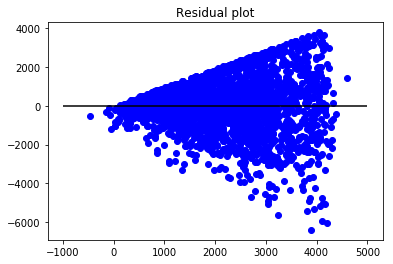

In [79]:
x_plot = plt.scatter(pred_cv, (pred_cv - y_cv), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

## ----------------------------------------

## Ridge Regression

In [83]:
from sklearn.linear_model import Ridge
from pandas import Series

In [86]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_cv)

In [88]:
mse = np.mean((pred_cv - y_cv)**2)

In [89]:
mse

1927718.664115257

In [90]:
print('Mean Squared Error : ', mse)
print('R-Square : ', ridgeReg.score(X_cv, y_cv))

Mean Squared Error :  1927718.664115257
R-Square :  0.33597028421136554


In [ ]:
lets consider different values of alpha(alpha=0.05,0.5,5,10 ) and plot the coefficients.                                     
As increases the value of alpha, 'magnitude of coefficients decreases' where the values reaches to zero but not absolute zero.
calculate R-square for each alpha, using the one which gives us lowest error.                                                  

If you notice, we come across an extra term, which is known as the 'penalty' term.                                            
'λ' given here, is actually denoted by alpha parameter in the 'ridge function'. So by changing the values of alpha, we are
basically controlling the penalty term. Higher the values of alpha, bigger is the penalty and therefore the magnitude of 
coefficients are reduced.

It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.                                          
It reduces the model complexity by coefficient shrinkage.                                                                      
It uses L2 regularization technique.                                                                                            

## --------------------------------------------------------

# Lasso Regression  (Least Absolute Shrinkage Selector Operator)

In [91]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)   # aplpha=0.05,0.5

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_cv)

In [92]:
mse = np.mean((pred_cv - y_cv)**2)

In [93]:
print('Mean Squared Error : ', mse)
print('R-Square : ', lassoReg.score(X_cv, y_cv))

Mean Squared Error :  1927718.664115257
R-Square :  0.3358128986448432


In [ ]:
lets change the value of alpha and see how does it affect the coefficients.                                                    
we can see that even at small values of alpha, the magnitude of coefficients have reduced a lot.                               

In case of Ridge as we increased the value of alpha, coefficients were approaching towards zero, 
But if you see in case of 'lasso' , even at smaller alpha’s, our coefficients are reducing to absolute zeroes.                
Therefore, lasso selects the only some feature while reduces the coefficients of others to zero.                            
This property is known as feature selection and which is absent in case of ridge.                                           

It uses L1 regularization technique.                                                                                          
It is generally used when we have more number of features, because it automatically does feature selection.

## -------------------------------------------------------

## Elastic Net Regression

In [94]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_cv)


mse = np.mean((pred_cv - y_cv)**2)

In [95]:
print('Mean Squared Error : ', mse)
print('R-Square : ', ENreg.score(X_cv, y_cv))

Mean Squared Error :  1973094.6831021125
R-Square :  0.3358128986448432


In [ ]:
Elastic net regression generally works well when we have a big dataset.                                                     

Elastic net is basically a combination of both L1 and L2 regularization. So if you know elastic net, you can implement both
'Ridge' and 'Lasso' by tuning the parameters. So it uses both L1 and L2 penality term.                                      

Let’ say, we have a bunch of correlated independent variables in a dataset, then elastic net will simply form a group consists
of these correlated variables. Now if any one of the variable of this group is a strong predictor
(means : having a strong relationship with dependent variable), then we will include the entire group in the model building,
because omitting other variables (like what we did in lasso) might result in losing some information in terms of interpretation
ability, leading to a poor model performance.

                alpha = a + b  and  l1_ratio =  a / (a+b)

'a' and 'b' weights assigned to L1 and L2. So when we change the values of alpha and l1_ratio,                                 
'a' and 'b' are set accordingly such that they control trade off between L1 and L2.                                            


                a * (L1 term) + b* (L2 term)
    
a * (L1 term) + b* (L2 term) , consider the following cases :                                                                  
    -If l1_ratio =1, l1_ratio can only be equal to 1 if a=1, which implies b=0. Therefore, it will be a lasso penalty.         
    -Similarly if l1_ratio = 0, implies a=0. Then the penalty will be a ridge penalty.                                         
    -For l1_ratio between 0 and 1, the penalty is the combination of ridge and lasso.                                          